<a href="https://colab.research.google.com/github/innosoft21/workspace/blob/main/tensorflow_python/%EA%B4%91%EA%B3%A0%ED%9A%A8%EC%9C%A8%ED%99%94_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

광고효율화 SMOTE

$$ Sythetic Minority Oversampling Technique (SMOTE)

Imabalanced dataset and SMOTE

Preprocessing

Logistic Regression without SMOTE

Logistic Regression with SMOTE

In [61]:
!pip install category_encoders

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visualization library

In [62]:
import os
for dirname, _, filenames in os.walk('/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [63]:
data = pd.read_csv("Train.csv", index_col='id')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 19717 to 30877
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   realtionship_status                26048 non-null  object 
 1   industry                           26048 non-null  object 
 2   genre                              26048 non-null  object 
 3   targeted_sex                       26048 non-null  object 
 4   average_runtime(minutes_per_week)  26048 non-null  int64  
 5   airtime                            26048 non-null  object 
 6   airlocation                        26048 non-null  object 
 7   ratings                            26048 non-null  float64
 8   expensive                          26048 non-null  object 
 9   money_back_guarantee               26048 non-null  object 
 10  netgain                            26048 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(8)
memory

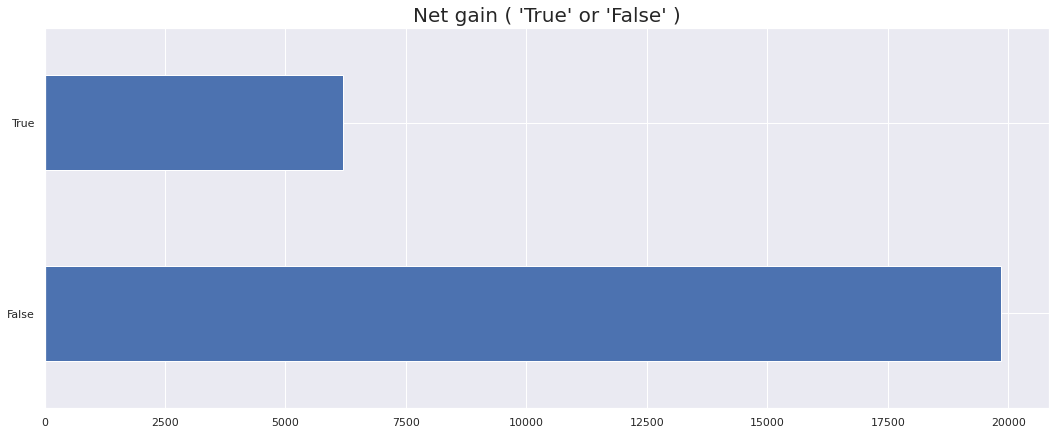

In [65]:
data.netgain.value_counts().plot(kind='barh')
plt.title('Net gain ( \'True\' or \'False\' )', fontsize=20)
plt.show()

In [45]:
data.head()

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
id,,,,,,,,,,,
19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


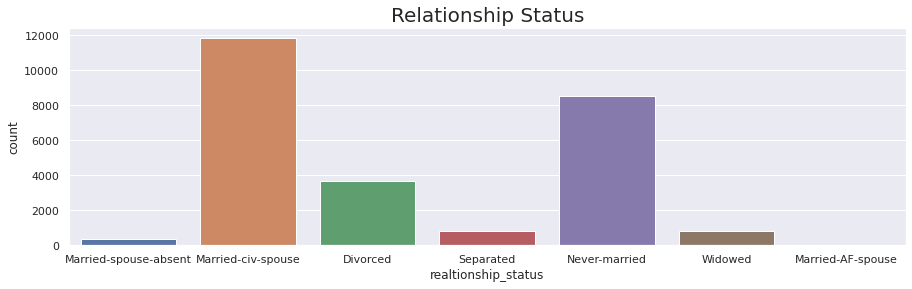

In [46]:
plt.figure(figsize=(15,4))
plt.title('Relationship Status',fontsize=20)
sns.countplot(data.realtionship_status)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


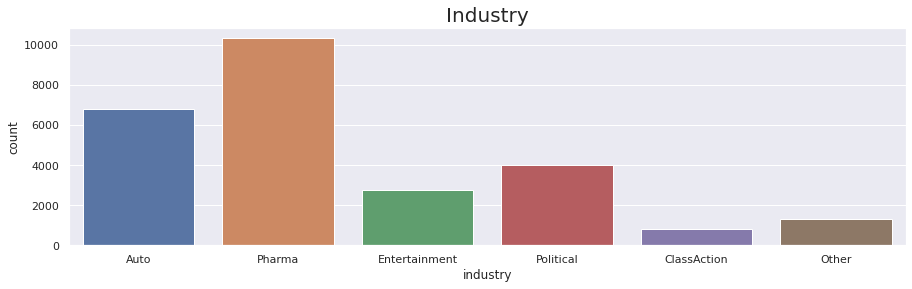

In [47]:
plt.figure(figsize=(15,4))
plt.title('Industry',fontsize=20)
sns.countplot(data.industry)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


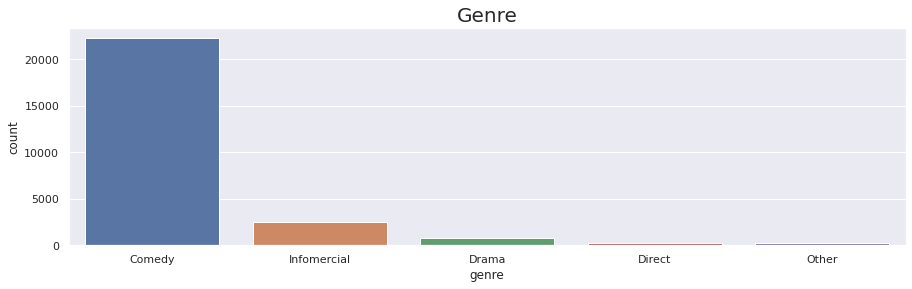

In [48]:
plt.figure(figsize=(15,4))
plt.title('Genre',fontsize=20)
sns.countplot(data.genre)
plt.show()

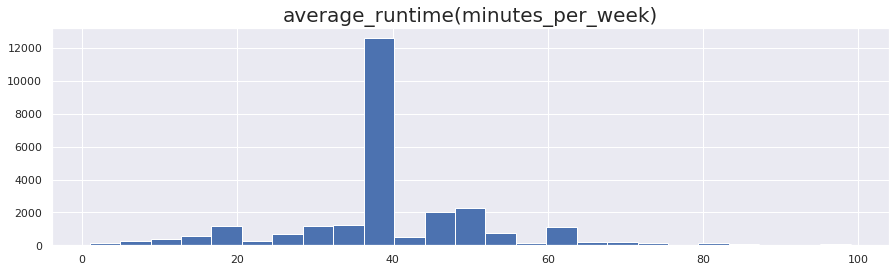

In [49]:
plt.figure(figsize=(15,4))
plt.hist(data['average_runtime(minutes_per_week)'],bins=25)
plt.title('average_runtime(minutes_per_week)',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


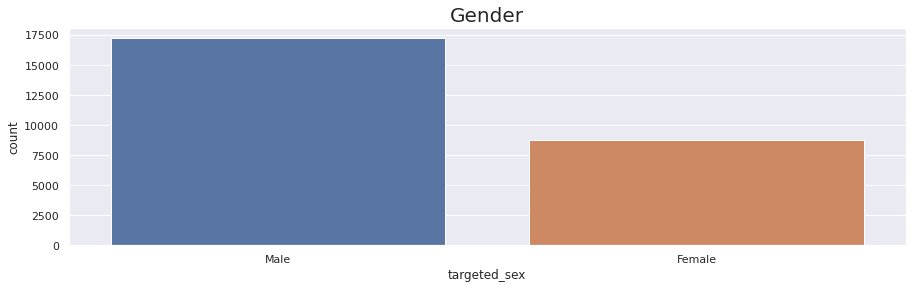

In [50]:
plt.figure(figsize=(15,4))
plt.title('Gender',fontsize=20)
sns.countplot(data.targeted_sex)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


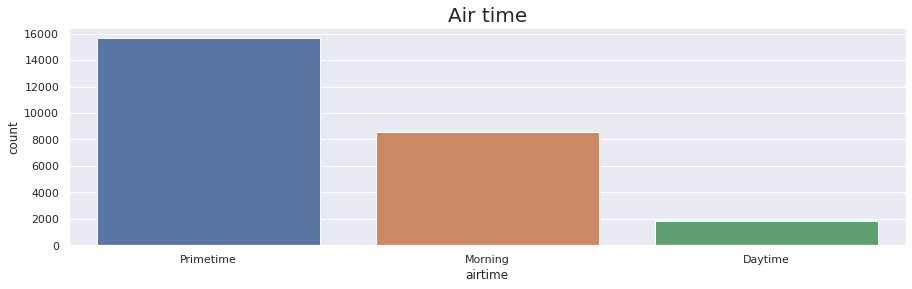

In [51]:
plt.figure(figsize=(15,4))
plt.title('Air time',fontsize=20)
sns.countplot(data.airtime)
plt.show()

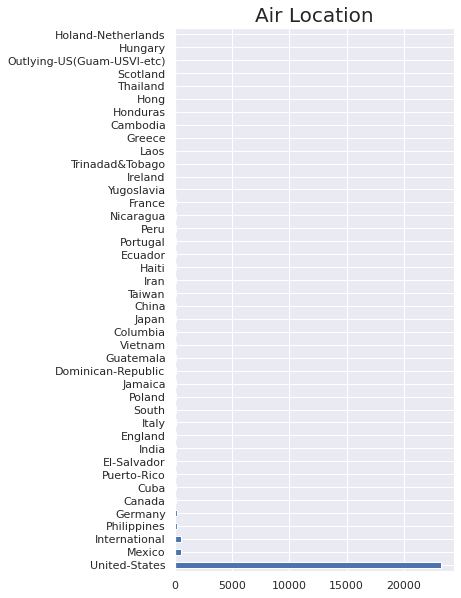

In [52]:
plt.figure(figsize=(5,10))
plt.title('Air Location',fontsize=20)
data.airlocation.value_counts().plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


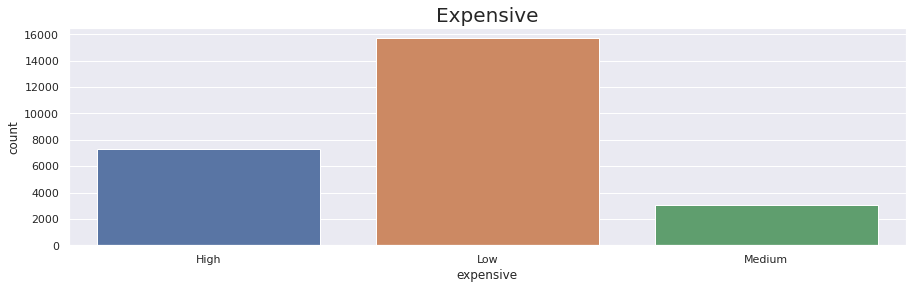

In [53]:
plt.figure(figsize=(15,4))
plt.title('Expensive',fontsize=20)
sns.countplot(data.expensive)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


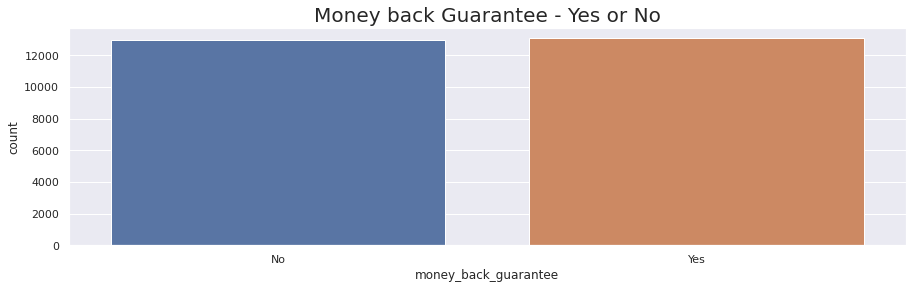

In [54]:
plt.figure(figsize=(15,4))
plt.title('Money back Guarantee - Yes or No',fontsize=20)
sns.countplot(data.money_back_guarantee)
plt.show()

Preprocessing

In [66]:
#Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
from sklearn.metrics import precision_score
#expensive is an ordinal categorical variable
exp_dict = {'Low':0,'Medium':1,'High':2}
data['expensive'] = data.expensive.map(exp_dict)

#Binary Categorical
Bin_columns = ['targeted_sex','money_back_guarantee']
Bin_Encoder = BinaryEncoder()

#Multi class nominal categorical
cat_columns = ['realtionship_status', 'industry', 'genre', 'airtime', 'airlocation' ]
OHE = OneHotEncoder(sparse=False)

encoding = ColumnTransformer(transformers=[('cat',OHE,cat_columns),
                                               ('bin',Bin_Encoder,Bin_columns)])

clf = Pipeline(steps=[('encoder',encoding),('Std',StandardScaler()),('LR',LogisticRegression())])

y, X = data['netgain'],data.drop('netgain',axis=1)

X_train, X_test, y_train,  y_test = train_test_split(X,y)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

precision_score(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.6432825943084051

In [67]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE 

#SMOTE have to be applied for training set only

preprocessor = Pipeline(steps=[('encoder',encoding),('Std',StandardScaler())])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

print("Shape of train dataset before applying SMOTE:",X_train.shape)

X_train, y_train = SMOTE().fit_resample(X_train,y_train)

print("Shape of train dataset after applying SMOTE:",X_train.shape)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Shape of train dataset before applying SMOTE: (19536, 67)
Shape of train dataset after applying SMOTE: (29704, 67)


현재 샘플이 10000개, minority class으로부터 합성됨

로지스틱 회귀 분석을 실시

In [68]:
lr2 = LogisticRegression()
lr2.fit(X_train,y_train)
y_pred2 = lr2.predict(X_test)
precision_score(y_pred2,y_test)

0.7637326273990734